In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv(r"C:\Users\Hovarthanvishnu\Downloads\Wine_Quality_prediction.csv.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
df = df.drop(columns='Id',axis=1,inplace=False)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [9]:
df.shape

(1143, 12)

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
for col in df.columns:
    print(f"Top 3 most frequent values in column '{col}':")
    print(df[col].value_counts().head(3))
    print("=======================")

Top 3 most frequent values in column 'fixed acidity':
fixed acidity
7.2    43
7.1    41
7.0    40
Name: count, dtype: int64
Top 3 most frequent values in column 'volatile acidity':
volatile acidity
0.60    32
0.50    32
0.43    31
Name: count, dtype: int64
Top 3 most frequent values in column 'citric acid':
citric acid
0.00    99
0.49    47
0.24    42
Name: count, dtype: int64
Top 3 most frequent values in column 'residual sugar':
residual sugar
2.0    107
2.1    103
1.8     92
Name: count, dtype: int64
Top 3 most frequent values in column 'chlorides':
chlorides
0.080    48
0.077    41
0.074    38
Name: count, dtype: int64
Top 3 most frequent values in column 'free sulfur dioxide':
free sulfur dioxide
6.0     99
5.0     80
12.0    58
Name: count, dtype: int64
Top 3 most frequent values in column 'total sulfur dioxide':
total sulfur dioxide
28.0    36
15.0    28
14.0    27
Name: count, dtype: int64
Top 3 most frequent values in column 'density':
density
0.9976    27
0.9972    25
0.9968 

C:\Users\Hovarthanvishnu\AppData\Local\Temp\ipykernel_15460\1654047137.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.barplot(x=quality_counts.index, y=quality_counts.values, palette=["yellow", "red", "blue"])
C:\Users\Hovarthanvishnu\AppData\Local\Temp\ipykernel_15460\1654047137.py:3: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax = sb.barplot(x=quality_counts.index, y=quality_counts.values, palette=["yellow", "red", "blue"])


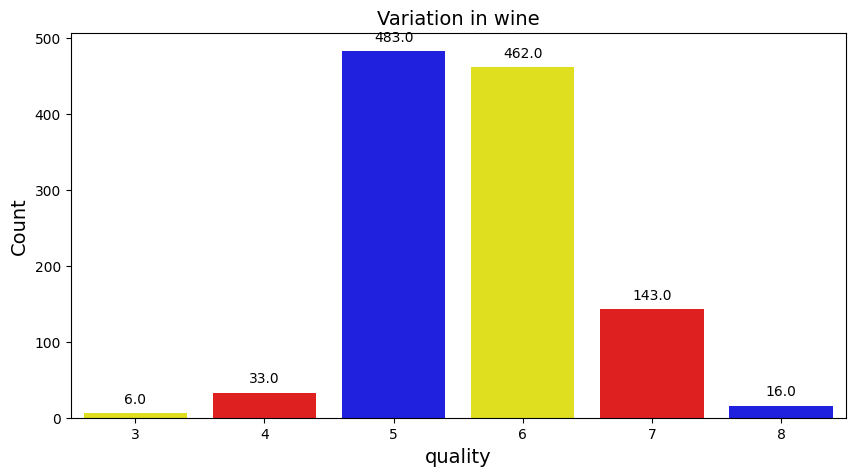

In [21]:
quality_counts = df['quality'].value_counts()
plt.figure(figsize=(10, 5))
ax = sb.barplot(x=quality_counts.index, y=quality_counts.values, palette=["yellow", "red", "blue"])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')
plt.title("Variation in wine", fontsize=14)
plt.xlabel("quality", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=0)
plt.show()

In [35]:
quality_counts

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

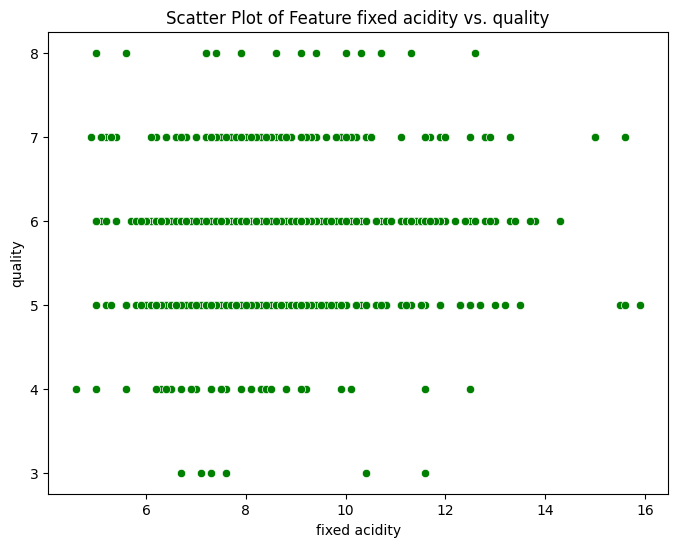

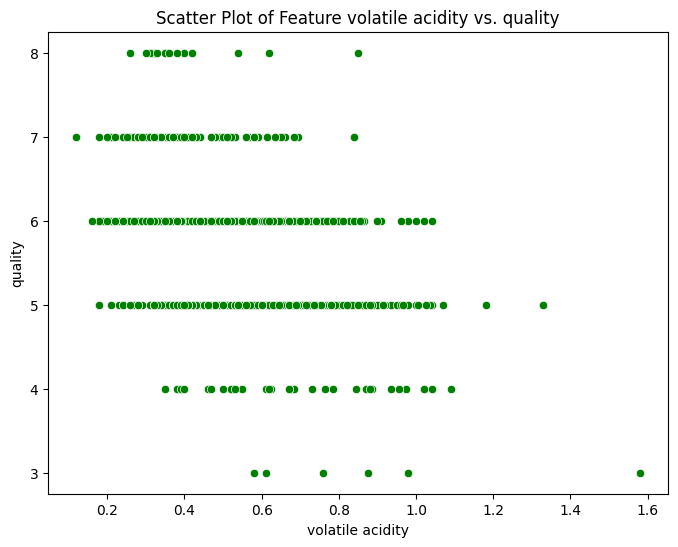

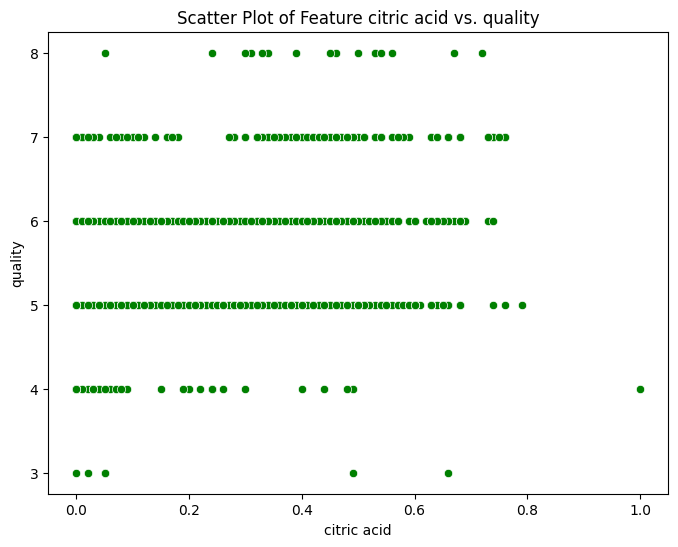

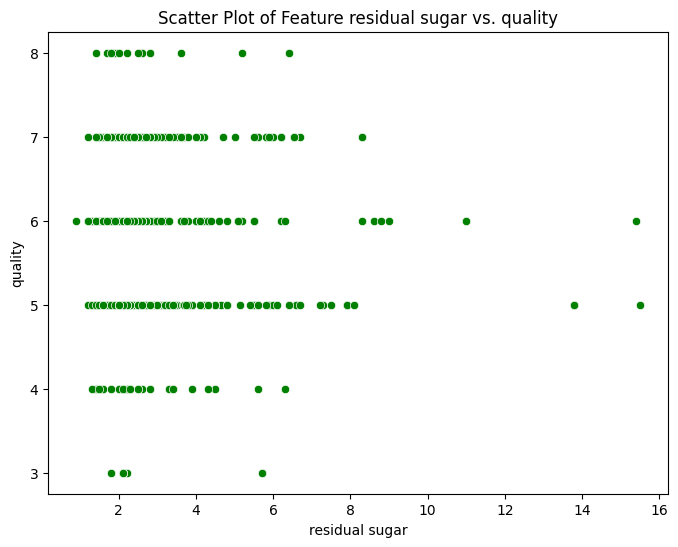

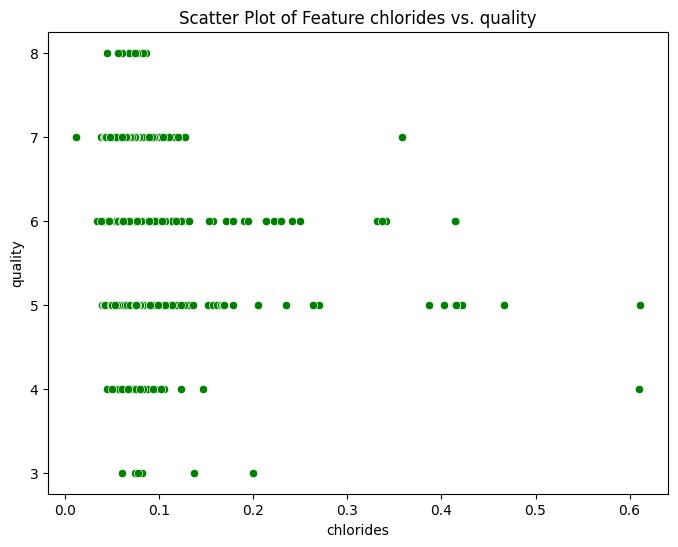

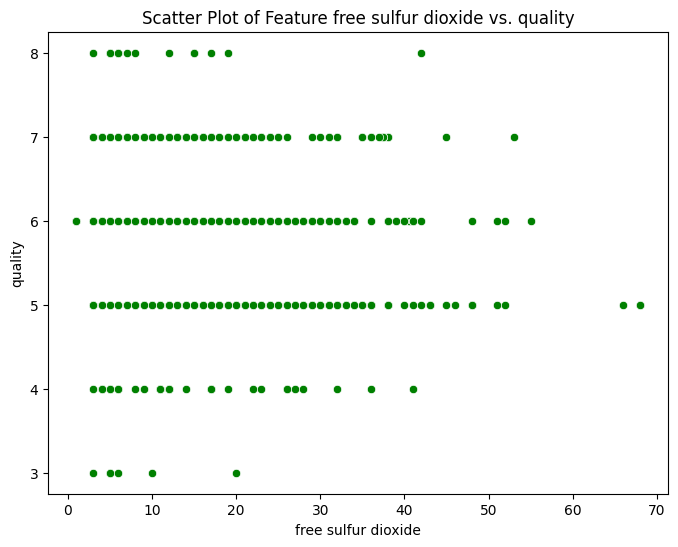

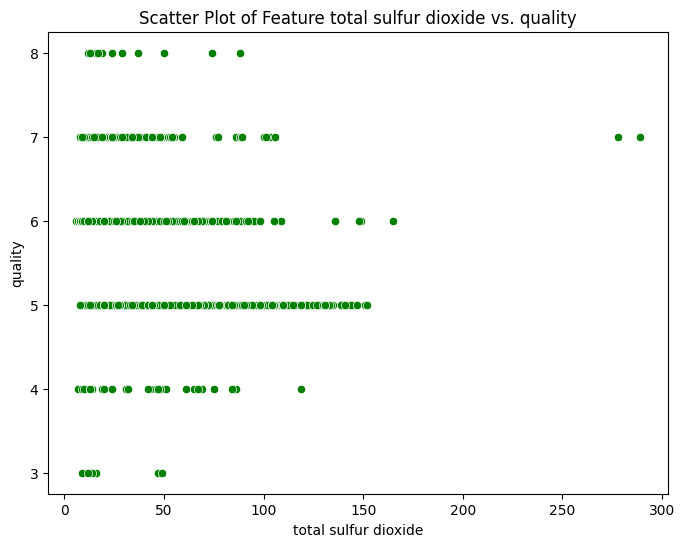

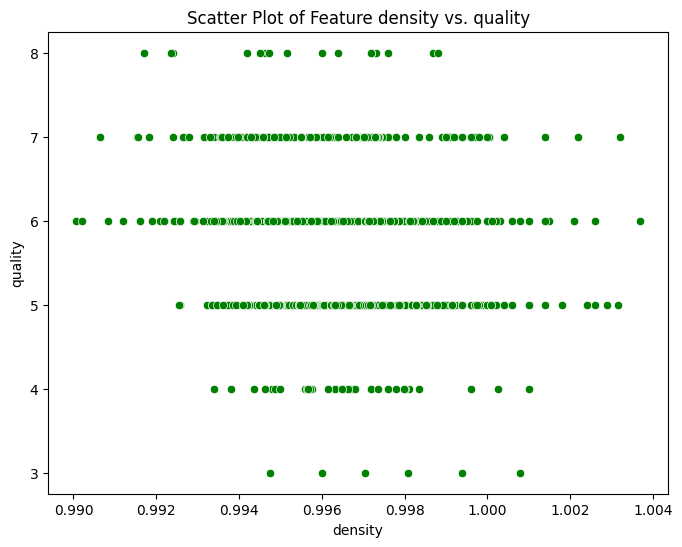

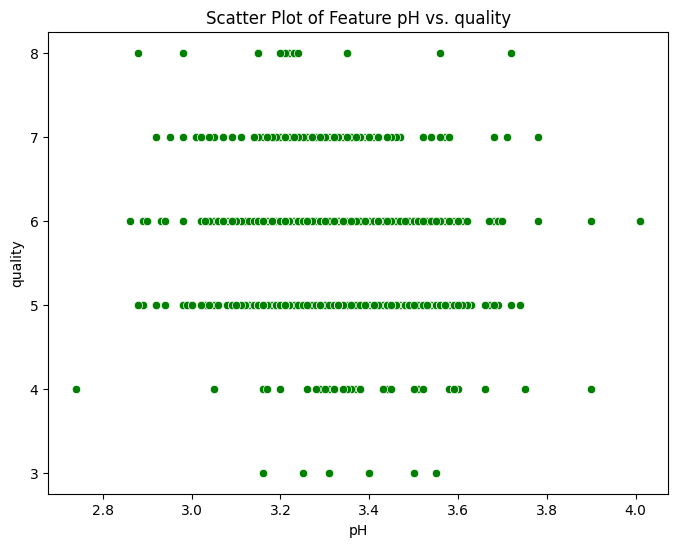

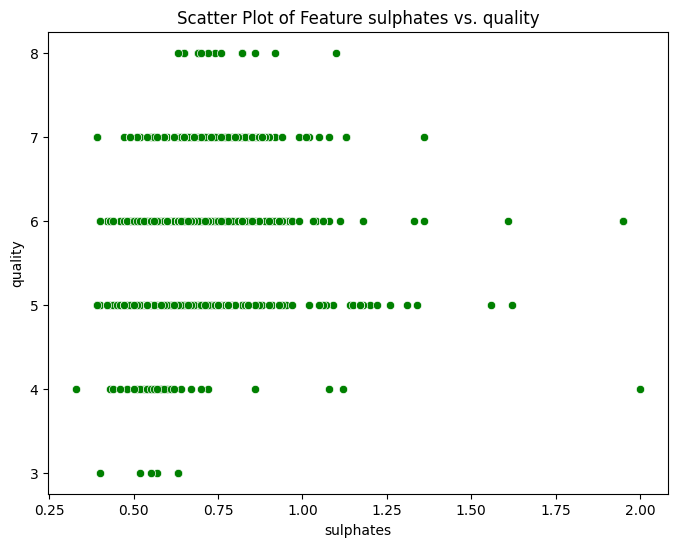

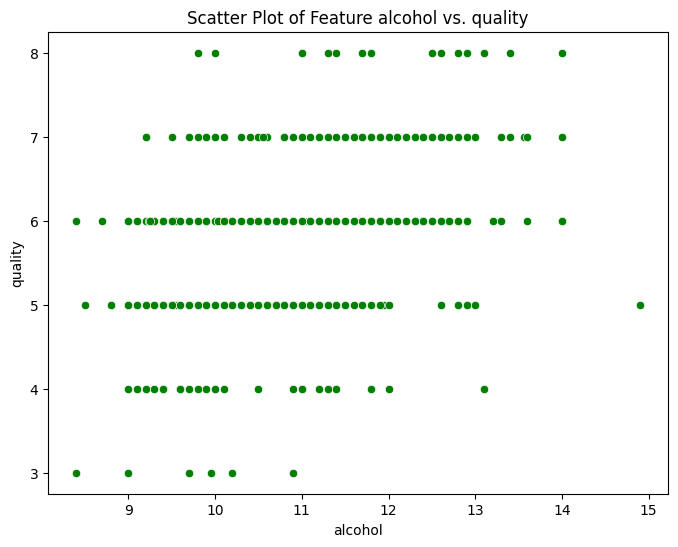

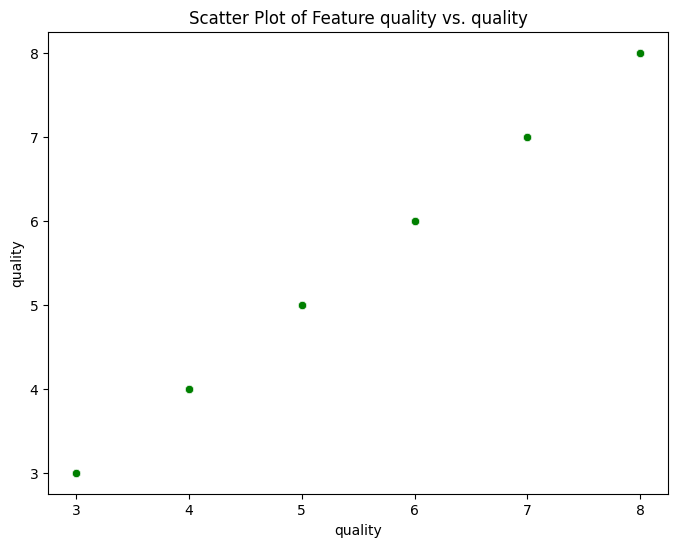

In [39]:
for col in df.columns:
    plt.figure(figsize=(8, 6))
    sb.scatterplot(x=col, y='quality', data=df,color='green')
    plt.title(f'Scatter Plot of Feature {col} vs. quality')
    plt.xlabel(col)
    plt.ylabel('quality')
    plt.show()


In [ ]:
#Calculating density and acidity for wine quality

C:\Users\Hovarthanvishnu\AppData\Local\Temp\ipykernel_15460\2964903356.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=df_corr_bar.index, y=df_corr_bar.values, palette="Blues_d").set_title('Feature Correlation Distribution According to Quality', fontsize=20)


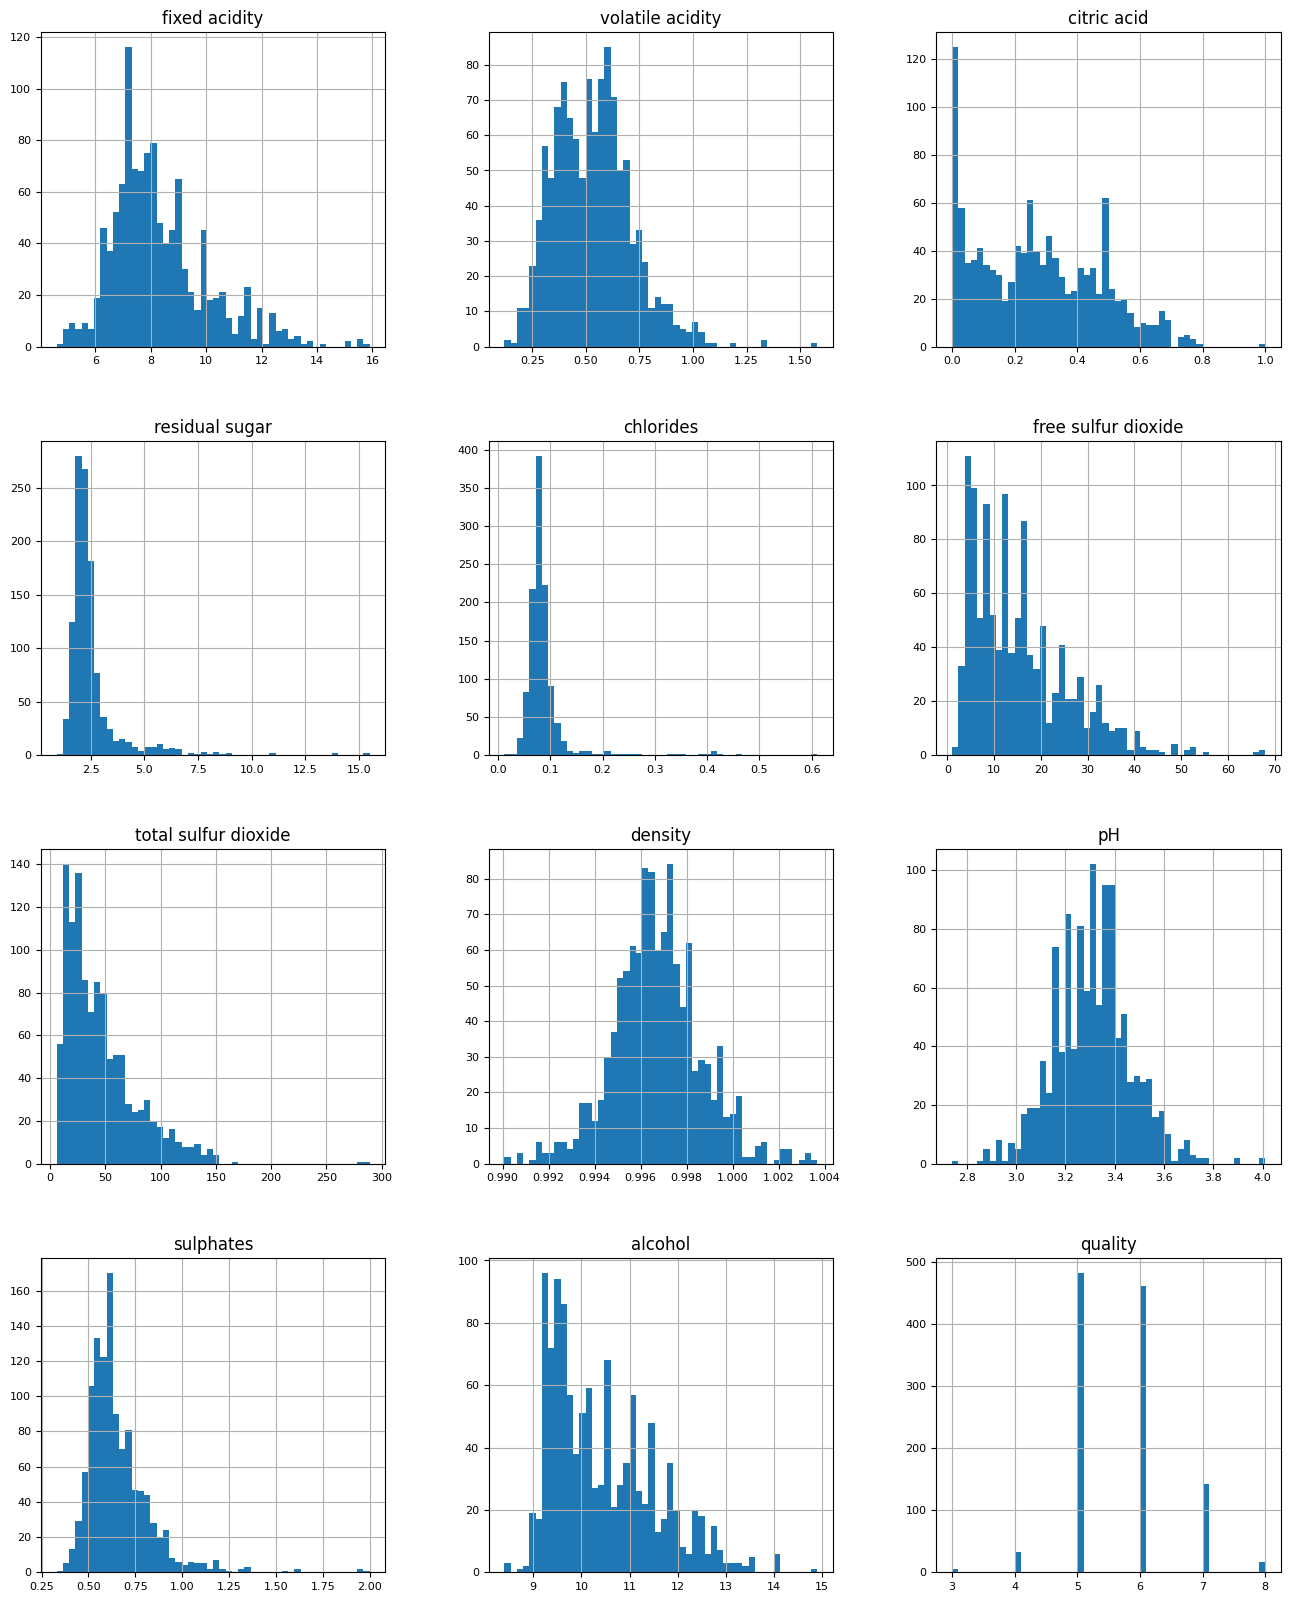

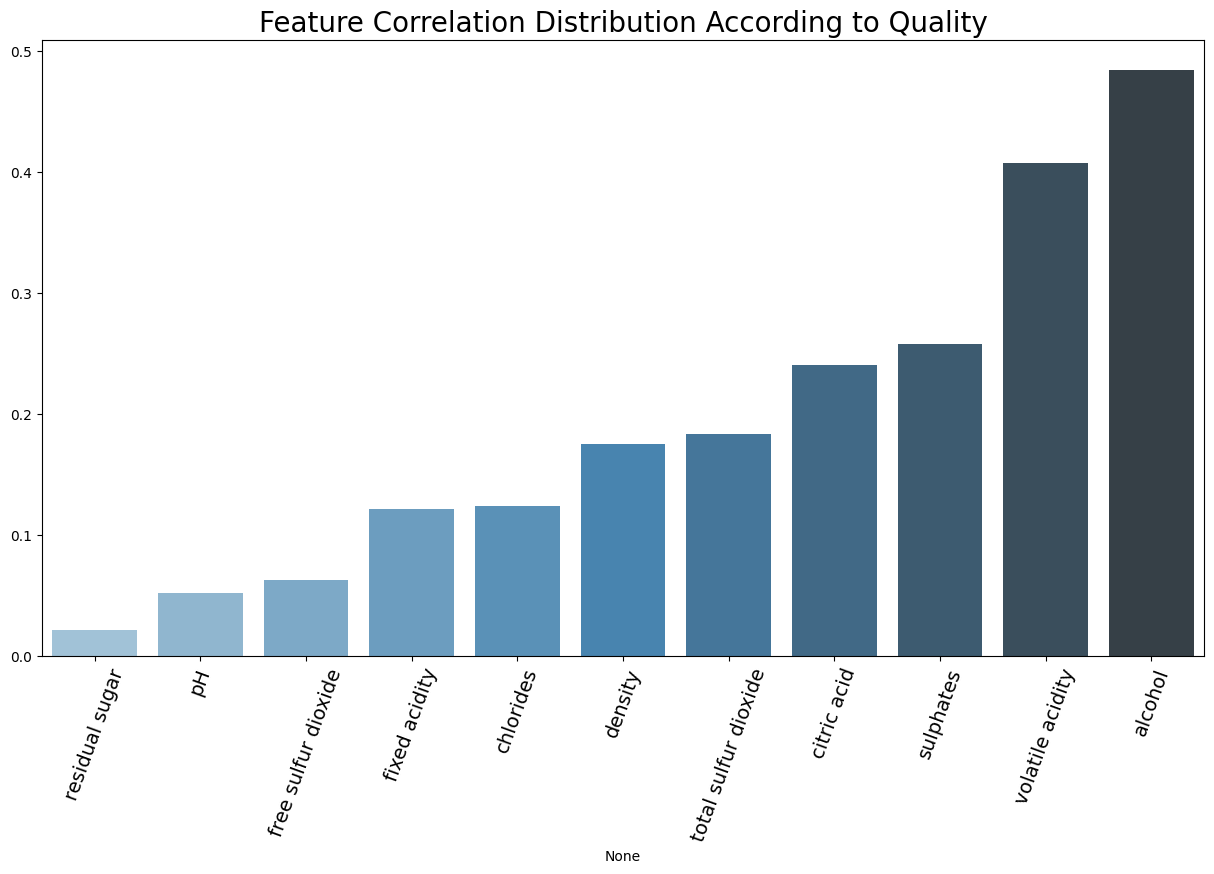

In [43]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);
plt.figure(figsize=(15, 8))
df_corr_bar = abs(df.corr()['quality']).sort_values()[:-1]
sb.barplot(x=df_corr_bar.index, y=df_corr_bar.values, palette="Blues_d").set_title('Feature Correlation Distribution According to Quality', fontsize=20)
plt.xticks(rotation=70, fontsize=14)
plt.show()

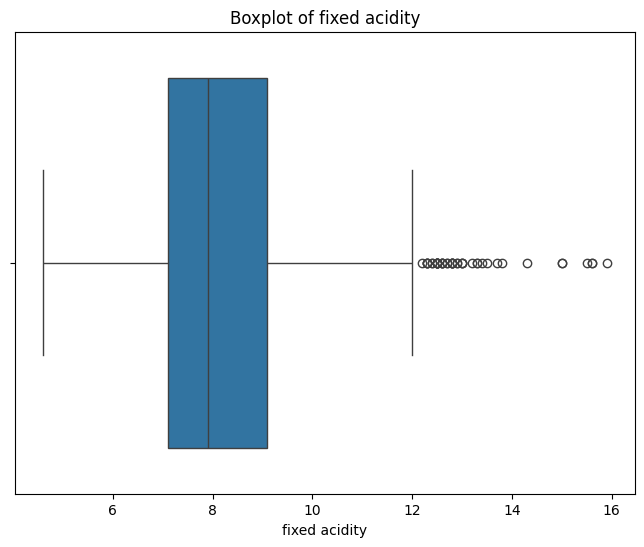

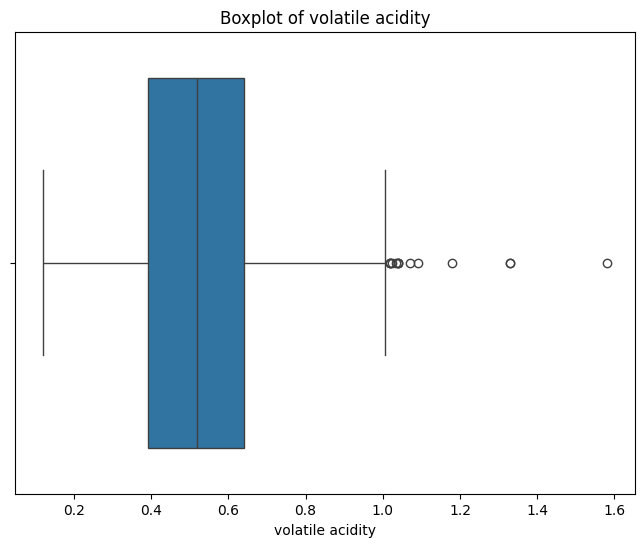

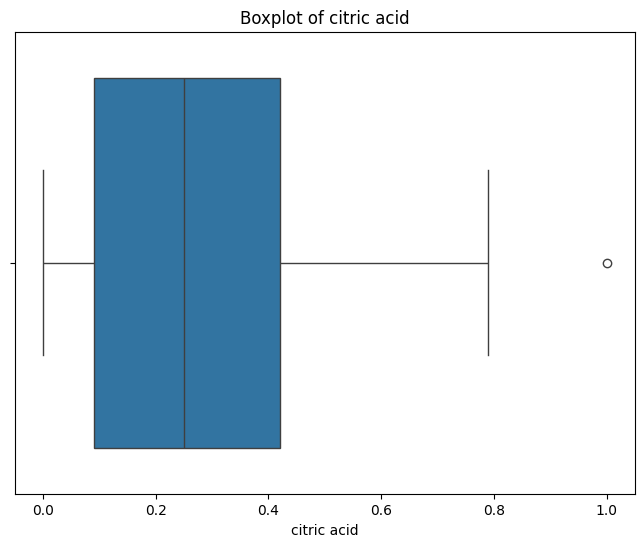

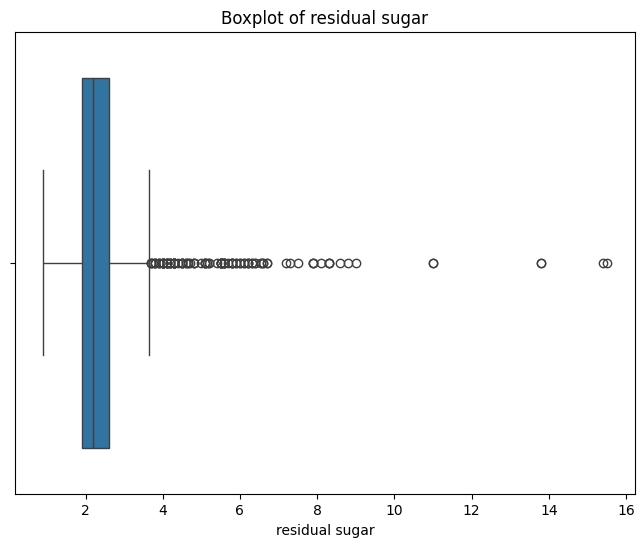

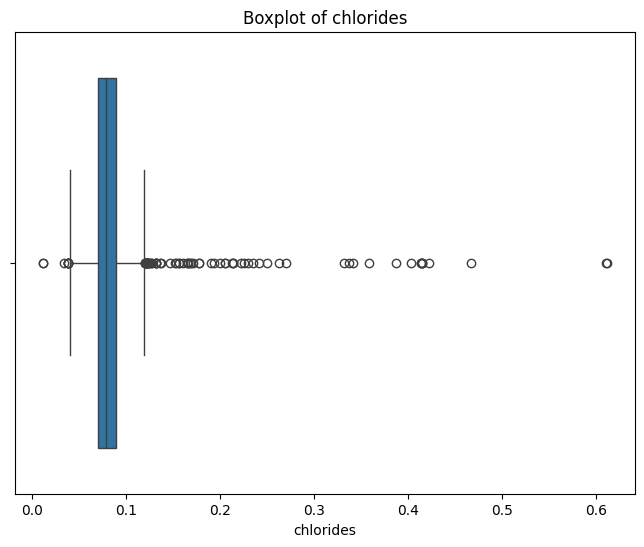

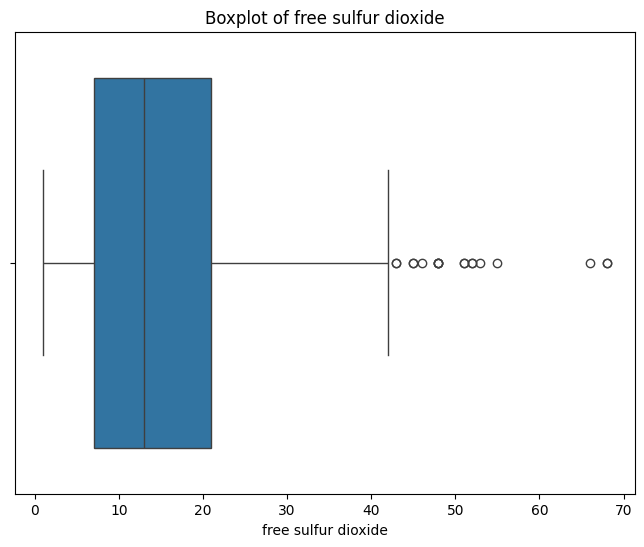

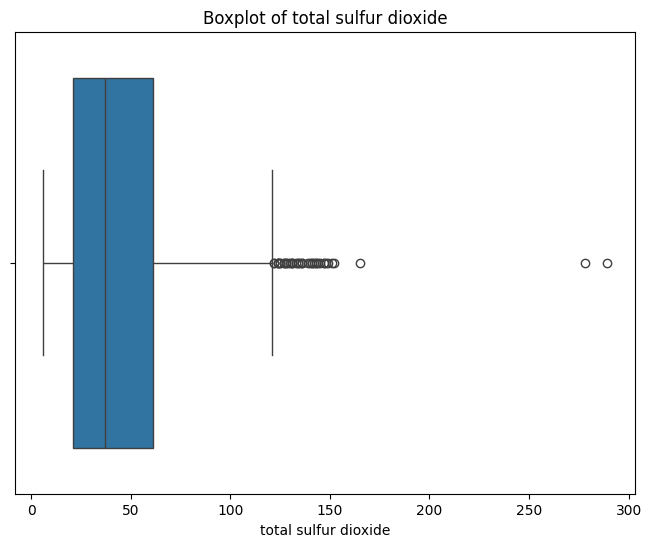

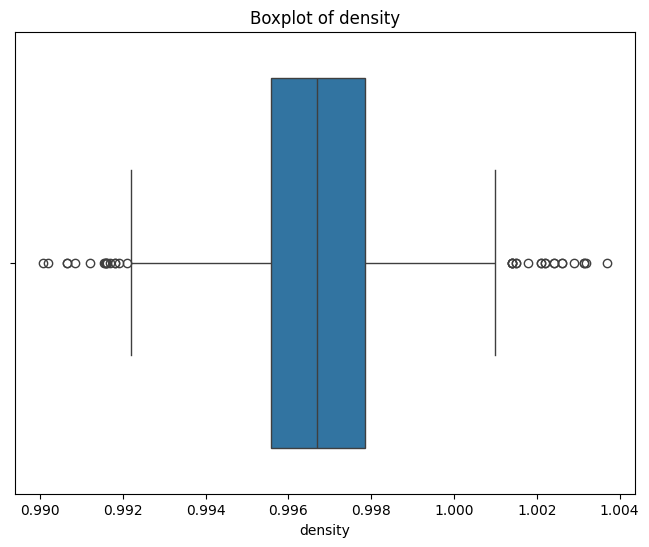

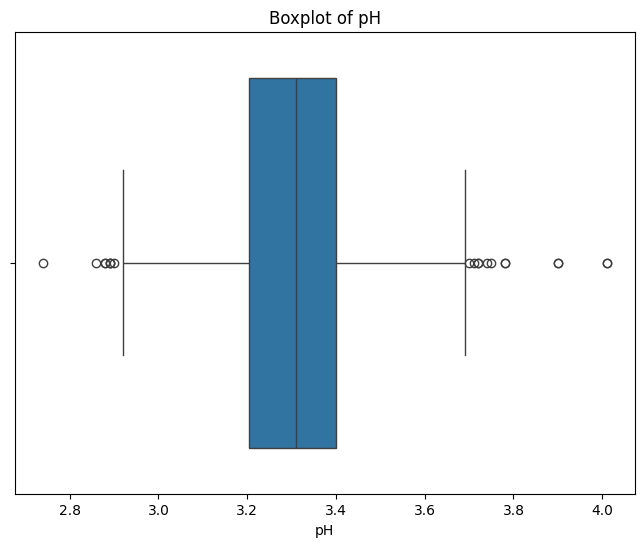

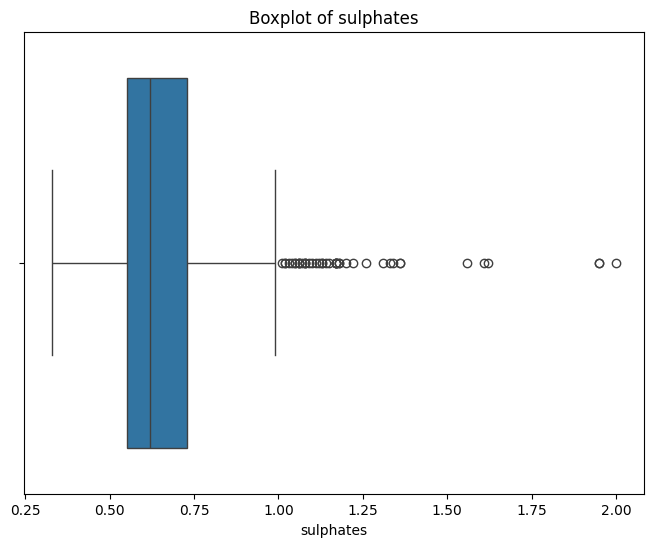

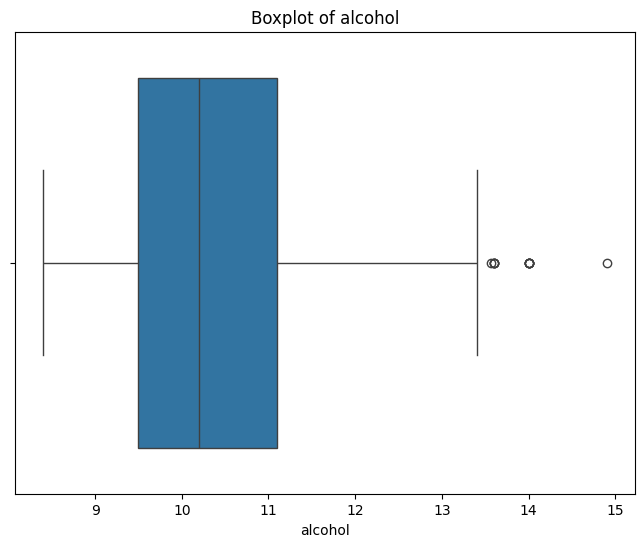

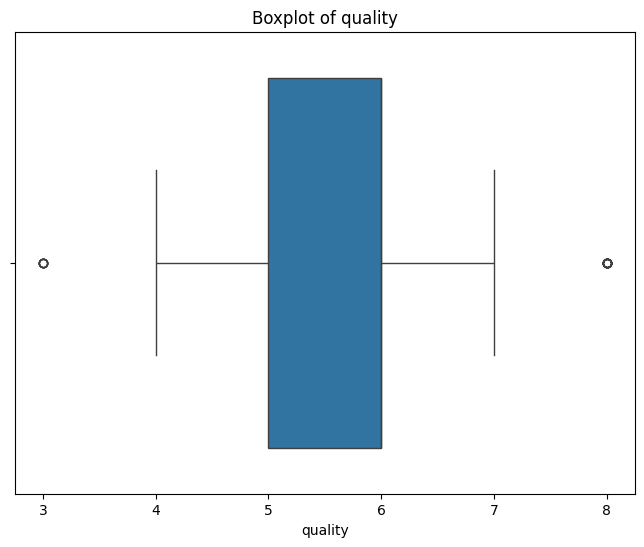

In [49]:
for col in df.columns:
    plt.figure(figsize=(8, 6))
    sb.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [51]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.450000,0.897500,0.211667,2.666667,0.105333,8.166667,24.500000,0.997682,3.361667,0.550000,9.691667
4,7.809091,0.700000,0.165758,2.566667,0.094788,14.848485,40.606061,0.996669,3.391212,0.637879,10.260606
5,8.161077,0.585280,0.240124,2.540476,0.091770,16.612836,55.299172,0.997073,3.302091,0.613375,9.902277
6,8.317749,0.504957,0.263680,2.444805,0.085281,15.215368,39.941558,0.996610,3.323788,0.676537,10.655339
7,8.851049,0.393671,0.386573,2.760140,0.075217,14.538462,37.489510,0.996071,3.287133,0.743566,11.482634
8,8.806250,0.410000,0.432500,2.643750,0.070187,11.062500,29.375000,0.995553,3.240625,0.766250,11.937500


In [53]:
df['quality'].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

In [59]:
data_yn=df.copy()
data_yn["good wine"] = ["No" if index < 6 else "Yes" for index in data_yn['quality']]
X = data_yn.drop(["quality"], axis = 1)
y = data_yn["good wine"]
data_yn=df.copy()
data_yn["good wine"] = [0 if index < 6 else 1 for index in data_yn['quality']]
X = data_yn.drop(["quality"], axis = 1)
y = data_yn["good wine"]

In [61]:
y.head()
y.value_counts()

good wine
1    621
0    522
Name: count, dtype: int64

In [63]:
scaler = MinMaxScaler(feature_range=(0, 1))
normal_data = data_yn.copy()
x = normal_data.drop(columns=['quality'])
normal_data =  normal_data.drop(columns=['quality'])
x


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good wine
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1


In [65]:
y = df['quality']
y

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

In [67]:
x = scaler.fit_transform(x)
x = pd.DataFrame(x,columns=normal_data.columns)
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good wine
0,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846,0.0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.358209,0.215548,0.494126,0.362205,0.209581,0.215385,0.0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.208955,0.169611,0.508811,0.409449,0.191617,0.215385,0.0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.238806,0.190813,0.582232,0.330709,0.149701,0.215385,1.0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846,0.0


In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,shuffle=True)
print(f"x train shape : {x_train.shape}")
print(f"x test shape : {x_test.shape}")
print(f"Y train shape : {y_train.shape}")
print(f"Y test shape : {y_train.shape}")

x train shape : (914, 12)
x test shape : (229, 12)
Y train shape : (914,)
Y test shape : (914,)


In [71]:
rf_model = RandomForestClassifier(n_estimators=1000, max_depth=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=100, n_estimators=1000, random_state=42)

In [73]:
y_pred = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 89.52%


In [77]:
y_predict = list(rf_model.predict(x_test))
predicted_data = {'predicted': y_predict, 'original': y_test}
predicted_data=pd.DataFrame(predicted_data)
predicted_data.head()

,predicted,original
158,5,5
1081,6,6
291,5,5
538,6,6
367,7,6


In [79]:
predicted_data['error']= [True if row['original']==row['predicted'] else False for index,row in predicted_data.iterrows()]
predicted_data.head()

,predicted,original,error
158,5,5,True
1081,6,6,True
291,5,5,True
538,6,6,True
367,7,6,False


In [81]:
predicted_data['error'].value_counts()

error
True     205
False     24
Name: count, dtype: int64

In [83]:
predicted_data=predicted_data.drop(columns="predicted",axis=1)
predicted_data.head()

,original,error
158,5,True
1081,6,True
291,5,True
538,6,True
367,6,False


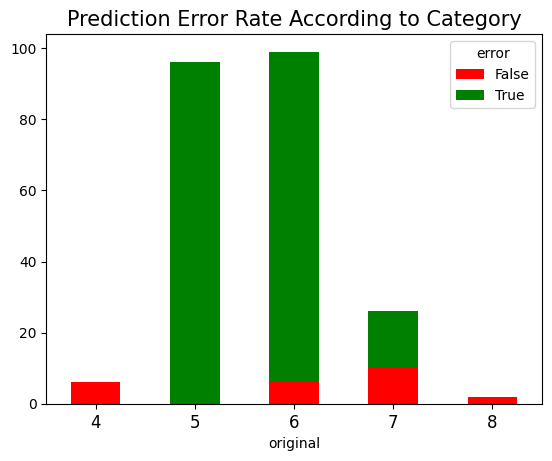

In [91]:
color = ['red', 'green']
test = predicted_data.groupby(['original', 'error'])['original'].count().unstack('error').fillna(0)
test.plot(kind='bar', stacked=True, color=color)
plt.title('Prediction Error Rate According to Category', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.ylim(0)
plt.show()

In [93]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [95]:
y_pred = knn_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 84.28%


In [97]:
y_predict = list(knn_model.predict(x_test))
predicted_data = {'predicted': y_predict, 'original': y_test}
predicted_data=pd.DataFrame(predicted_data)
predicted_data.head()

,predicted,original
158,5,5
1081,6,6
291,5,5
538,6,6
367,6,6


In [99]:
svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)

SVC(kernel='linear')

In [101]:
y_pred = svm_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 85.15%


In [103]:
y_predict = list(svm_model.predict(x_test))
predicted_data = {'predicted': y_predict, 'original': y_test}
predicted_data=pd.DataFrame(predicted_data)
predicted_data.head()

,predicted,original
158,5,5
1081,6,6
291,5,5
538,6,6
367,6,6


In [105]:
Linear_Regression_model = LinearRegression()
Linear_Regression_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
#Employing pandas for data manipulation and numpy for an array operations

In [107]:
predictions = Linear_Regression_model.predict(x_test)
rounded_predictions = np.round(predictions)
mse = mean_squared_error(y_test, rounded_predictions)
print(f"Mean Squared Error (with rounding): {mse}")
rounded_predictions = rounded_predictions.astype(int)

Mean Squared Error (with rounding): 0.13973799126637554


In [115]:
y_predict = list(rounded_predictions)
predicted_data = {'predicted': y_predict, 'original': y_test}
predicted_data = pd.DataFrame(predicted_data)
predicted_data.head()

,predicted,original
158,5,5
1081,6,6
291,5,5
538,6,6
367,6,6


In [ ]:
#Final patterns is displayed using seaborn and matplotlib

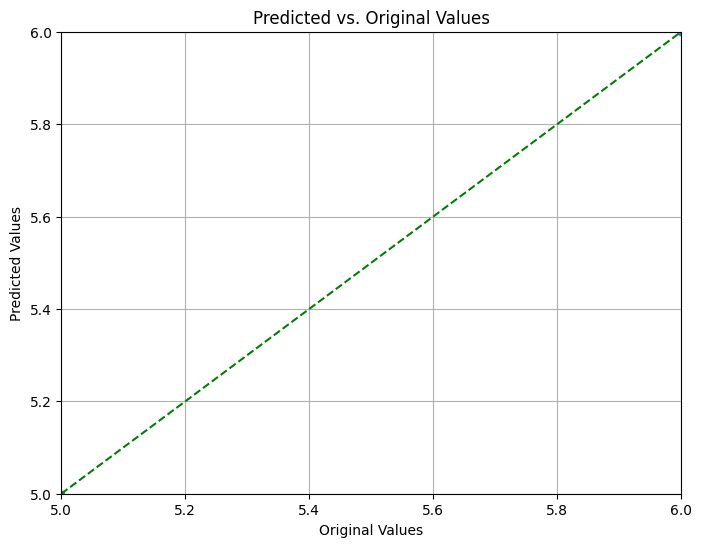

In [127]:
df = {
    'predicted': [5, 6, 5, 6, 6],
    'original': [5, 6, 5, 6, 6]
}
data = pd.DataFrame(df)
plt.figure(figsize=(8, 6))
sb.scatterplot(x='original', y='predicted', data=data)
min_value = data[['original', 'predicted']].min().min()
max_value = data[['original', 'predicted']].max().max()
plt.plot([min_value, max_value], [min_value, max_value], color='green', linestyle='--')
plt.title('Predicted vs. Original Values')
plt.xlabel('Original Values')
plt.ylabel('Predicted Values')
plt.xlim(min_value, max_value)
plt.ylim(min_value, max_value)
plt.grid()
plt.show()

In [ ]:
#This is the final quality of wine prediction.